In [1]:
import numpy as np
import pandas as pd
import json
import tensorflow as tf

seed_ = 20200218
tf.random.set_seed(seed_)
np.random.seed(seed_)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Sarcasm

ทำ classifier กับข้อมูล Sarcasm

## Load Data

In [2]:
with open("./data/Sarcasm_Headlines_Dataset_v2.json", "r", encoding="utf-8") as f:
    lines = f.readlines()
    json_data = [json.loads(line) for line in lines]

In [3]:
json_data[:5]

[{'is_sarcastic': 1,
  'headline': 'thirtysomething scientists unveil doomsday clock of hair loss',
  'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'},
 {'is_sarcastic': 0,
  'headline': 'dem rep. totally nails why congress is falling short on gender, racial equality',
  'article_link': 'https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207'},
 {'is_sarcastic': 0,
  'headline': 'eat your veggies: 9 deliciously different recipes',
  'article_link': 'https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html'},
 {'is_sarcastic': 1,
  'headline': 'inclement weather prevents liar from getting to work',
  'article_link': 'https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031'},
 {'is_sarcastic': 1,
  'headline': "mother comes pretty close to using word 'streaming' correctly",
  'article_link': 'https://www.theonion.com/mother-comes-pretty-

In [4]:
df = pd.DataFrame(json_data)

In [5]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [6]:
df.shape

(28619, 3)

## Model

### prepare data

In [7]:
# config

num_words = 10000
embedding_dims = 16
max_length = 32
pad_trunc = 'post'
pad_type = 'pre'
oov_token = '<OOV>'

training_size = 20000

In [8]:
df_train = df.iloc[:training_size]
df_test = df.iloc[training_size:]

In [9]:
# tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_words, 
                                                  oov_token=oov_token)

In [10]:
tokenizer.fit_on_texts(df_train['headline'])
word_index = tokenizer.word_index

for k in list(word_index.keys())[:10]:
    print(f"{k}:\t{word_index[k]}")

<OOV>:	1
to:	2
of:	3
the:	4
in:	5
for:	6
a:	7
on:	8
and:	9
with:	10


In [11]:
train_sequences = tokenizer.texts_to_sequences(df_train['headline'])
test_sequences = tokenizer.texts_to_sequences(df_test['headline'])

In [12]:
padded_train = tf.keras.preprocessing.sequence.pad_sequences(
    train_sequences, maxlen=max_length, padding=pad_type, truncating=pad_trunc
)

padded_test = tf.keras.preprocessing.sequence.pad_sequences(
    test_sequences, maxlen=max_length, padding=pad_type, truncating=pad_trunc
)

### model

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dims, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
optimizer = tf.keras.optimizers.Adam()

In [15]:
model.compile(optimizer=optimizer, metrics=['accuracy'], loss='binary_crossentropy')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [17]:
hist = model.fit(padded_train, 
          df_train['is_sarcastic'], 
          batch_size=64, epochs=30, 
          validation_data=(padded_test, df_test['is_sarcastic']))

Epoch 1/30
313/313 [==============================] - 2s 8ms/step - loss: 0.6319 - accuracy: 0.6619 - val_loss: 0.4891 - val_accuracy: 0.8176
Epoch 2/30
313/313 [==============================] - 3s 8ms/step - loss: 0.3765 - accuracy: 0.8515 - val_loss: 0.3501 - val_accuracy: 0.8520
Epoch 3/30
313/313 [==============================] - 2s 7ms/step - loss: 0.2759 - accuracy: 0.8932 - val_loss: 0.3294 - val_accuracy: 0.8557
Epoch 4/30
313/313 [==============================] - 2s 7ms/step - loss: 0.2243 - accuracy: 0.9157 - val_loss: 0.3300 - val_accuracy: 0.8572
Epoch 5/30
313/313 [==============================] - 2s 7ms/step - loss: 0.1896 - accuracy: 0.9296 - val_loss: 0.3429 - val_accuracy: 0.8547
Epoch 6/30
313/313 [==============================] - 2s 7ms/step - loss: 0.1624 - accuracy: 0.9416 - val_loss: 0.3671 - val_accuracy: 0.8453
Epoch 7/30
313/313 [==============================] - 2s 7ms/step - loss: 0.1412 - accuracy: 0.9508 - val_loss: 0.3872 - val_accuracy: 0.8442
Epoch 

c:\users\chuan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\chuan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

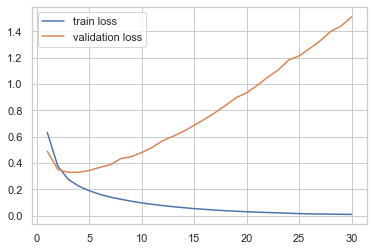

In [18]:
num_epochs = len(hist.history['loss'])
epochs = np.arange(1, num_epochs+1)

sns.lineplot(epochs, hist.history['loss'], label='train loss')
sns.lineplot(epochs, hist.history['val_loss'], label='validation loss')

c:\users\chuan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\chuan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

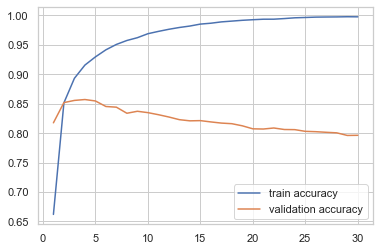

In [19]:
sns.lineplot(epochs, hist.history['accuracy'], label='train accuracy')
sns.lineplot(epochs, hist.history['val_accuracy'], label='validation accuracy')